In [1]:
import pymongo
import pandas as pd

DB_CONN_STRING = "mongodb://localhost:27017/"
DB_NAME = "recent-poland-covid-vaccine-tweets"
COLLECTION_NAME = "tweets"

mongo_client = pymongo.MongoClient(DB_CONN_STRING)
database_name = mongo_client[DB_NAME]
data_collection = database_name[COLLECTION_NAME]

projection = {'replyCount': 1, 'retweetCount': 1, 'likeCount': 1, 'quoteCount': 1, 'sentiment': 1}
tweets = [tweet for tweet in data_collection.find({'covid_topic': True},projection)]

df = pd.DataFrame(tweets)

In [2]:
df = df[df['replyCount'] < 300]
df = df[df['retweetCount'] < 300]
df = df[df['likeCount'] < 2000]
df = df[df['quoteCount'] < 100]

In [3]:
RED = '#b50000'
YELLOW = '#ffe100'
GREEN = '#13bd00'

def get_color(sentiment):
    if float(sentiment) < 0:
        return RED
    if float(sentiment) == 0:
        return YELLOW
    if float(sentiment) > 0:
        return GREEN
    
readable_colnames = {
    'replyCount': "Reply count",
    'retweetCount': "Retweet count", 
    'likeCount': "Like count", 
    'quoteCount': "Quote count"
}

In [4]:
import matplotlib.pyplot as plt

def plot_dispersion(df, col1, col2):
    x = df[col1]
    y = df[col2]
    c = df['sentiment'].apply(lambda x: get_color(x))
    s = [4 for i in range(len(c))]
    
    f, ax = plt.subplots(figsize=(15,10))
    ax.scatter(x,y, c=c, s=s)
    plt.xlabel(readable_colnames[col1], fontsize=16)
    plt.ylabel(readable_colnames[col2], fontsize=16)
#     plt.gca().set_aspect('equal')

    plt.title(f"{readable_colnames[col1]} vs {readable_colnames[col2]}", fontsize=18)
    return ax

In [5]:
# possible_params = ['replyCount', 'retweetCount', 'likeCount', 'quoteCount']
# possible_plots = [(p1, p2) if p1 < p2 else "" for p1 in possible_params for p2 in possible_params]
# possible_plots = list(filter(lambda p: p != '', possible_plots))

# for pp in possible_plots:
#     print(f'plot_dispersion(df,\'{pp[0]}\',\'{pp[1]}\')')

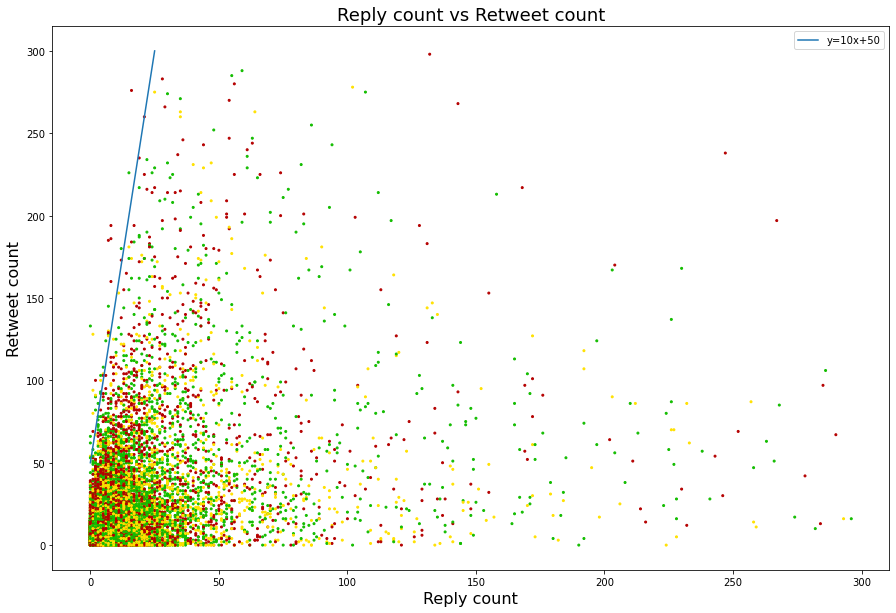

In [6]:
ax = plot_dispersion(df,'replyCount','retweetCount')
ax.plot([0,25], [50, 300], label="y=10x+50")
plt.legend()

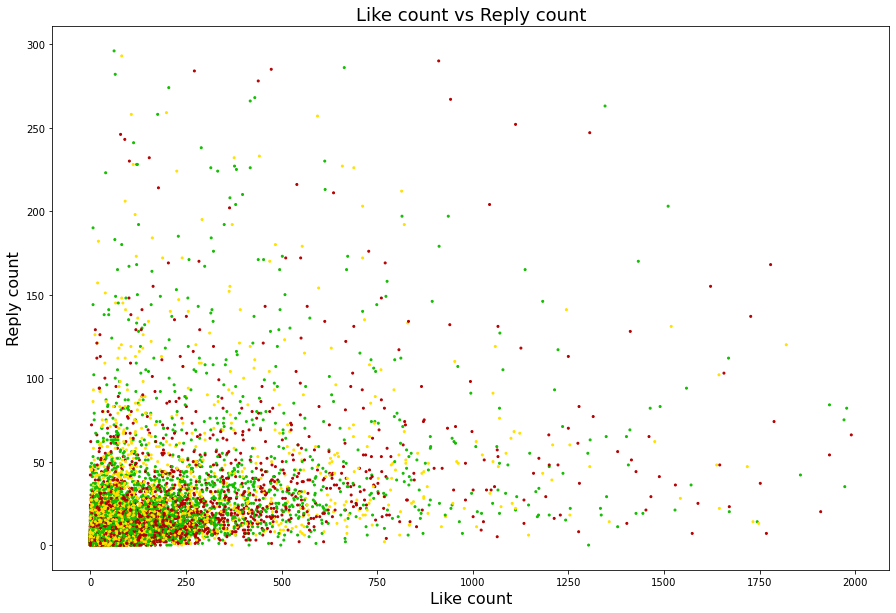

In [7]:
plot_dispersion(df,'likeCount','replyCount')

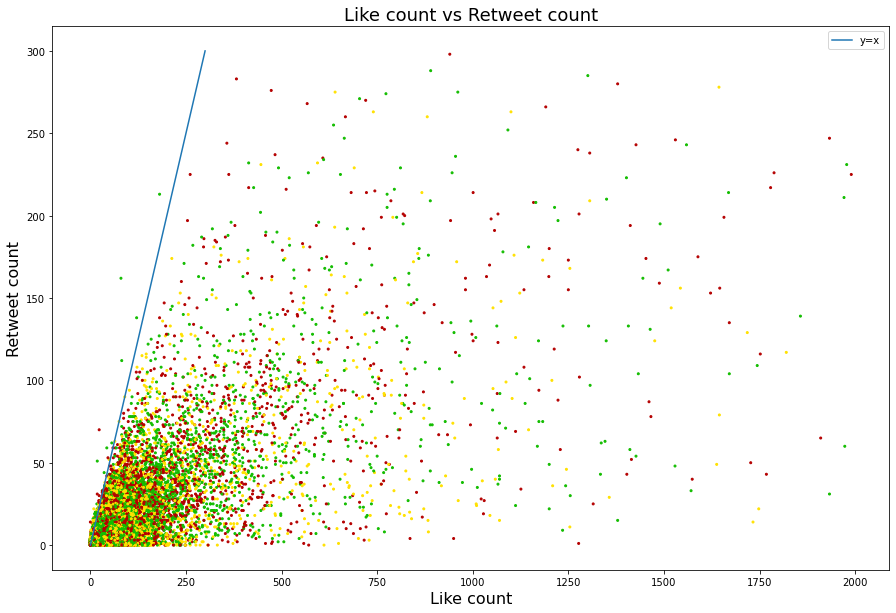

In [8]:
ax = plot_dispersion(df,'likeCount','retweetCount')
ax.plot([0,300], [0, 300], label="y=x")
plt.legend()

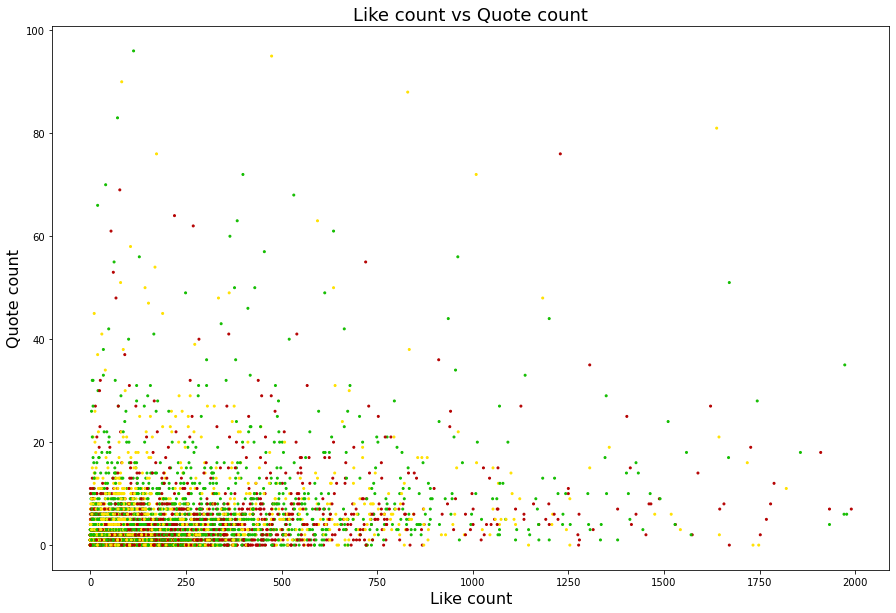

In [9]:
plot_dispersion(df,'likeCount','quoteCount')

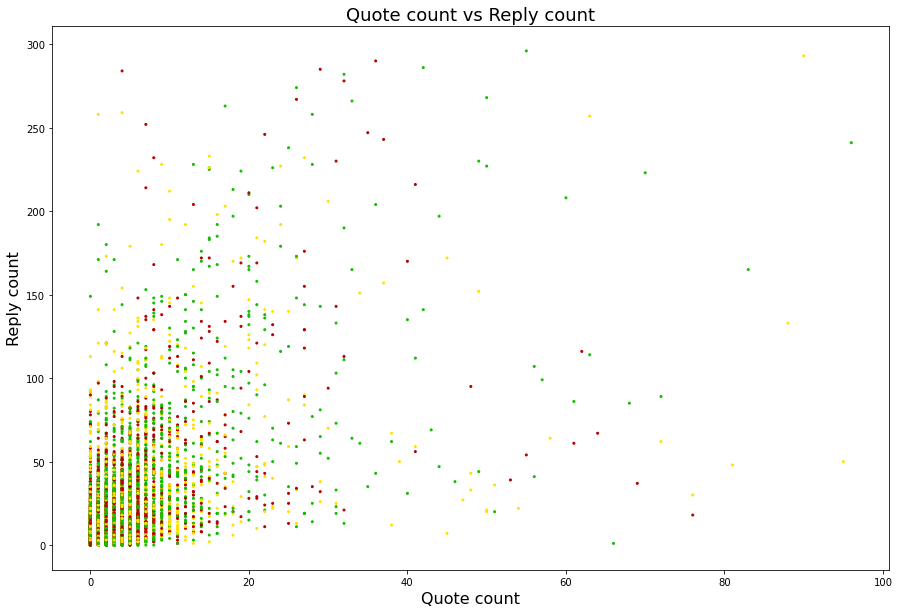

In [10]:
plot_dispersion(df,'quoteCount','replyCount')

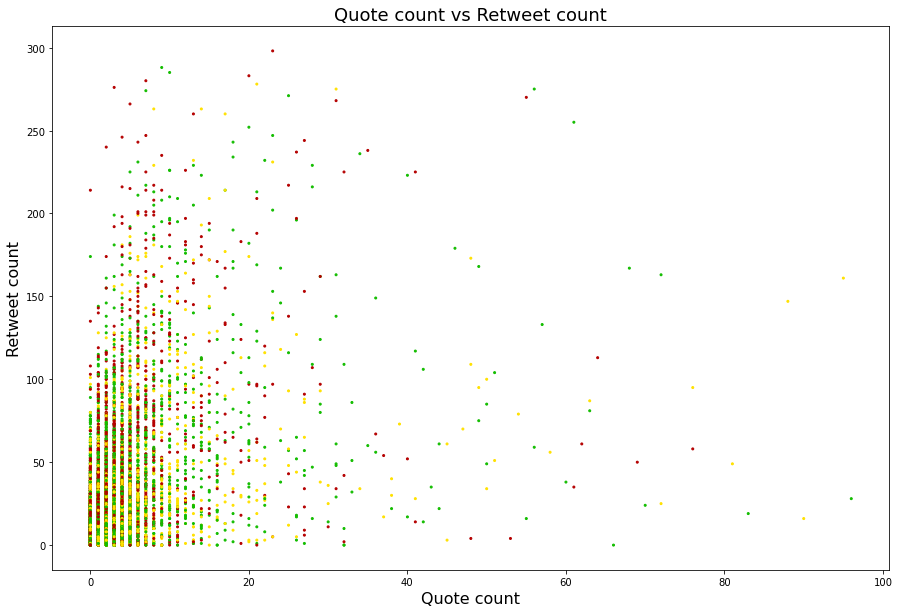

In [11]:
plot_dispersion(df,'quoteCount','retweetCount')